### Decision Tree Model for Classifying Buildings Manual Entry edition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 50)

In [2]:
# next load the data
df = pd.read_csv('ModelFourTrainingDataset.csv')
df.head()

,buildingID,latitude,longitude,postalCode,propertyAddress,isBuilding,buildingAge,builtBefore1990,buildingHeightLessThan4,ImageClassID,balconyAbsent,exteriorFinish,suitabilityForRetrofit
0,1,-75.670072,45.402417,K1S1G5,1861 Rideau Garden Drive,0,0,0,0,0,0,0,Z
1,2,-75.700138,45.413555,K1R5J8,498 Somerset Street West,0,0,0,0,0,0,0,Z
2,3,-75.922406,45.263028,K2S1E4,6 Hampel Crescent,0,0,0,0,0,0,0,Z
3,4,-75.537676,45.461061,K1C7P7,528 Woodcliffe Private,1,30,0,0,31,1,0,D
4,5,-75.500092,45.470118,K1E1R8,337 Nagel Avenue,0,0,0,0,0,0,0,Z


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   buildingID               1250 non-null   int64  
 1   latitude                 1250 non-null   float64
 2   longitude                1250 non-null   float64
 3   postalCode               1250 non-null   object 
 4   propertyAddress          1250 non-null   object 
 5   isBuilding               1250 non-null   int64  
 6   buildingAge              1250 non-null   int64  
 7   builtBefore1990          1250 non-null   int64  
 8   buildingHeightLessThan4  1250 non-null   int64  
 9   ImageClassID             1250 non-null   int64  
 10  balconyAbsent            1250 non-null   int64  
 11  exteriorFinish           1250 non-null   int64  
 12  suitabilityForRetrofit   1250 non-null   object 
dtypes: float64(2), int64(8), object(3)
memory usage: 127.1+ KB


In [4]:
df.describe()

,buildingID,latitude,longitude,isBuilding,buildingAge,builtBefore1990,buildingHeightLessThan4,ImageClassID,balconyAbsent,exteriorFinish
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000
mean,625.500000,-75.699207,45.372977,0.913600,63.596000,0.628800,0.372800,15.131200,0.465600,0.450400
std,360.988227,0.120896,0.070614,0.281066,53.606482,0.483319,0.483743,10.007303,0.499015,0.497733
min,1.000000,-76.217516,44.989057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,313.250000,-75.760148,45.326429,1.000000,14.000000,0.000000,0.000000,6.000000,0.000000,0.000000
50%,625.500000,-75.688469,45.378647,1.000000,48.000000,1.000000,0.000000,15.000000,0.000000,0.000000
75%,937.750000,-75.631395,45.430284,1.000000,110.000000,1.000000,1.000000,24.000000,1.000000,1.000000
max,1250.000000,-75.292995,45.517659,1.000000,176.000000,1.000000,1.000000,32.000000,1.000000,1.000000


In [5]:
# check for missing values in each variable
df.isnull().sum()

buildingID                 0
latitude                   0
longitude                  0
postalCode                 0
propertyAddress            0
isBuilding                 0
buildingAge                0
builtBefore1990            0
buildingHeightLessThan4    0
ImageClassID               0
balconyAbsent              0
exteriorFinish             0
suitabilityForRetrofit     0
dtype: int64

In [6]:
df.dtypes

buildingID                   int64
latitude                   float64
longitude                  float64
postalCode                  object
propertyAddress             object
isBuilding                   int64
buildingAge                  int64
builtBefore1990              int64
buildingHeightLessThan4      int64
ImageClassID                 int64
balconyAbsent                int64
exteriorFinish               int64
suitabilityForRetrofit      object
dtype: object

In [7]:
# check the shape of the dataset
df.shape

(1250, 13)

In [8]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:ylabel='suitabilityForRetrofit'>

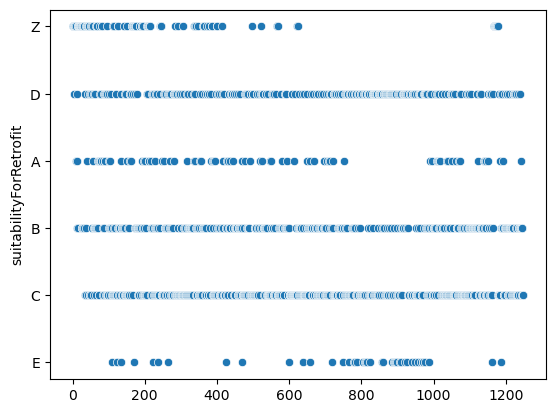

In [9]:
sns.scatterplot(df['suitabilityForRetrofit'])

In [10]:
# drop all variables from the data that we won't need for the model.
df = df.drop(['buildingID', 'latitude', 'longitude', 'postalCode', 'propertyAddress','ImageClassID'], axis = 1)

In [11]:
df.dtypes

isBuilding                  int64
buildingAge                 int64
builtBefore1990             int64
buildingHeightLessThan4     int64
balconyAbsent               int64
exteriorFinish              int64
suitabilityForRetrofit     object
dtype: object

In [12]:
# seperate input features in x
x = df.drop('suitabilityForRetrofit', axis = 1)

# store the target variable in y
y = df['suitabilityForRetrofit']

In [13]:
# import module
from sklearn.model_selection import train_test_split

# Split the dataset
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.20, random_state=11)

In [14]:
# check the split using shape
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((1000, 6), (250, 6), (1000,), (250,))

In [37]:
# import Decision Tree model
from sklearn.tree import DecisionTreeClassifier

In [16]:
# Let's list the tunable hyperparameters for Decision Tree algorithm
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [17]:
# create an instane of the model
dt = DecisionTreeClassifier(max_depth = 5, max_features=6)

In [18]:
# train the model
dtmodel = dt.fit(xtrain,ytrain)

In [19]:
# Predict on x_test
y_pred = dt.predict(xtest)

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
# Evaluate the Model
print('Accuracy of Random Forest model on the train set: {:.2f}'.format(dt.score(xtrain, ytrain)))
print('Accuracy of Random Forest model on the test set: {:.2f}'.format(dt.score(xtest, ytest)))
cm = confusion_matrix(ytest, y_pred)

Accuracy of Random Forest model on the train set: 1.00
Accuracy of Random Forest model on the test set: 1.00


In [22]:
cm

array([[12,  0,  0,  0,  0,  0],
       [ 0, 67,  0,  0,  0,  0],
       [ 0,  0, 93,  0,  0,  0],
       [ 0,  0,  0, 48,  0,  0],
       [ 0,  0,  0,  0,  8,  0],
       [ 0,  0,  0,  0,  0, 22]], dtype=int64)

In [23]:
dt.feature_names_in_

array(['isBuilding', 'buildingAge', 'builtBefore1990',
       'buildingHeightLessThan4', 'balconyAbsent', 'exteriorFinish'],
      dtype=object)

In [24]:
dt.feature_importances_

array([0.13167492, 0.46356797, 0.05482514, 0.19871891, 0.06491802,
       0.08629506])

In [25]:
#y_pred

In [26]:
"""plt.figure(figsize=(8,8))
sns.heatmap(cm, annot = True, xticklabels='auto', yticklabels='auto')

# display the plot
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()"""

"plt.figure(figsize=(8,8))\nsns.heatmap(cm, annot = True, xticklabels='auto', yticklabels='auto')\n\n# display the plot\nplt.xlabel('Predicted Label')\nplt.ylabel('Actual Label')\nplt.title('Confusion Matrix')\nplt.show()"

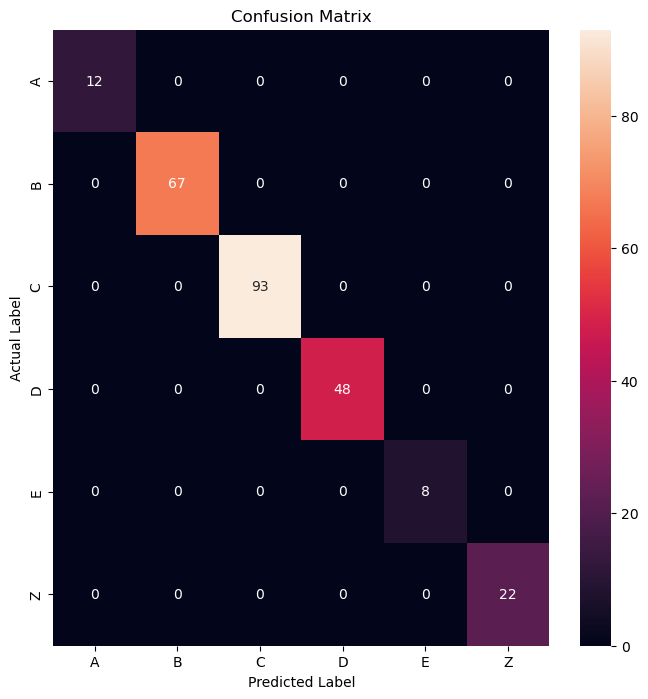

In [27]:
plt.figure(figsize=(8,8))
dtplot=sns.heatmap(cm, annot = True, xticklabels='auto', yticklabels='auto')

# display the plot
dtplot.set_xlabel('Predicted Label')
dtplot.xaxis.set_ticklabels(['A','B','C','D','E','Z'])

dtplot.set_ylabel('Actual Label')
dtplot.yaxis.set_ticklabels(['A','B','C','D','E','Z'])

dtplot.set_title('Confusion Matrix')
plt.show()

In [28]:
#Save the model
import pickle

In [35]:
pickle.dump(dt,open('DECISIONTREE_MODEL_MANUAL','wb'))

In [36]:
#load the model
model4_manual = pickle.load(open('DECISIONTREE_MODEL_MANUAL','rb'))

In [31]:
# Make predictions using the model
model4_manual.predict([[1,34,1,1,0,0]])

array(['C'], dtype=object)

In [32]:
# Make predictions using the model
model4_manual.predict([[1,20,0,1,1,1]])

array(['B'], dtype=object)

In [33]:
# Make predictions using the model
model4_manual.predict([[0,0,0,0,0,0]])

array(['Z'], dtype=object)

In [34]:
# Make predictions using the model
model4_manual.predict([[1,40,1,0,1,1]])

array(['B'], dtype=object)